# Explicit Description of Optimal Foraging Theory

While the intuition for optimal foraging is straightforward, it is uncommon to find a numerical 
description of optimal foraging

_Let us define the equation governing rate of resource consumption:_

$\dot I = r e^{(t-T)/r} \ | \ t>T$

$\dot I = 0 \ | \ t<T$

Note: Any decreasing function might do the job; except for a resource rich patch, $\ddot I$ should be lower than that for a resource rich patch

(for fun try: $\dot I = r e^{-(t-T)}$)

$I$ is the __Net Resource Gain__ 

$r$ is __Resource Richness/Foraging Efficiency__

$T$ is __Traveling Time__

In [451]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [452]:
#defining parameters
r = 1
T = 3
t_max = 10

In [497]:
t = np.arange(0,t_max,1e-2)
I_dot = r*(np.exp(-0.5*(t-T)))
I_dot[t<=T] = 0
df = pd.DataFrame({'I_dot':I_dot,'t':t})

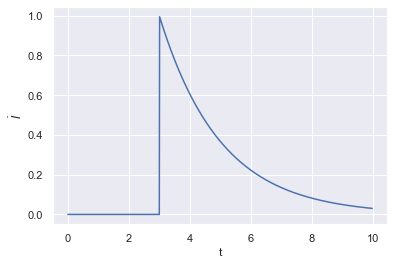

In [565]:
sns.lineplot(y ='I_dot',x = 't', data = df);
plt.ylabel('$\dot I$');

In [499]:
#numerically integrate I_dot to get a curve for cumulative resource consumed over time
def euler(dt, t_max, I_dot):
    I = np.zeros(np.size(t))
    I_p = 0
    for inst in np.arange(0,t_max,dt):
        dI = I_dot[t==inst]*dt
        I[t==inst] = I_p + dI
        I_p = I[t==inst]
    return I

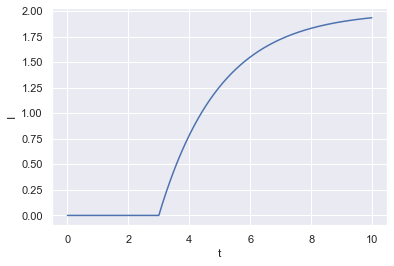

In [500]:
df['I'] = euler(1e-2,t_max,I_dot)
sns.lineplot(y ='I',x = 't', data = df);

optimal exit time =  5.7


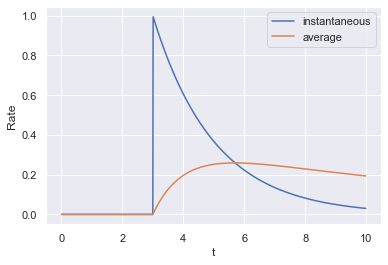

In [501]:
#to get optimal foraging time, compare average foraging rate (including traveling time) to instantaneous foraging rate
df['I/t'] = df['I']/df['t']
t_opt = df['t'][df['I_dot']<df['I/t']].iloc[0]

sns.lineplot(y ='I_dot',x = 't', data = df)
sns.lineplot(y ='I/t',x = 't', data = df)
plt.ylabel('Rate'); plt.legend(['instantaneous', 'average'])

print('optimal exit time = ', t_opt)

In [502]:
#Now plot the average the line which passes through the point at which the two rates are equal:
df['optimality'] = (df['I'][df['t']>=t_opt].iloc[0])/t_opt*df['t']

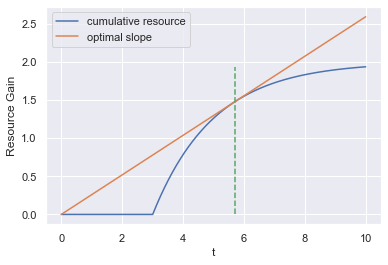

In [503]:
sns.lineplot(y ='I',x = 't', data = df)
sns.lineplot(y ='optimality',x = 't', data = df)

plt.plot([t_opt, t_opt], [0, df['I'].max()], linestyle = '--');

plt.ylabel('Resource Gain'); plt.legend(['cumulative resource','optimal slope']);

Note tangential behaviour!

## Comparing distinct environments each with a single patch type

In [482]:
#defining parameters
r_a = 1
r_b = 1.5 #resource rich environment
T_a = 2
T_b = 2 #higher traveling time
t_max = 10

In [522]:
t = np.arange(0,t_max,1e-2)
I_dot_a = r_a*(np.exp(-(1/r_a)*(t-T_a))); I_dot_a[t<=T_a] = 0 #try I_dot_a = r_a*(np.exp(-(t-T_a))); I_dot_a[t<=T_a] = 0
I_dot_b = r_b*(np.exp(-(1/r_b)*(t-T_b))); I_dot_b[t<=T_b] = 0 #try I_dot_a = r_b*(np.exp(-(t-T_b))); I_dot_b[t<=T_b] = 0
df2 = pd.DataFrame({'I_dot_a':I_dot_a, 'I_dot_b':I_dot_b, 't':t})

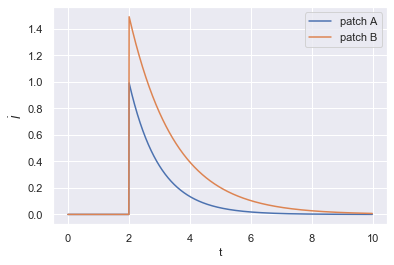

In [566]:
sns.lineplot(y ='I_dot_a',x = 't', data = df2)
sns.lineplot(y ='I_dot_b',x = 't', data = df2)
plt.ylabel('I_dot'); plt.legend(['patch A','patch B']);
plt.ylabel('$\dot I$');

In [524]:
#Now numerically integrate both patches and get optimal exit times
df2['I_a'] = euler(1e-2,t_max,I_dot_a); df2['I_b'] = euler(1e-2,t_max,I_dot_b);
df2['I/t_a'] = df2['I_a']/df2['t']
df2['I/t_b'] = df2['I_b']/df2['t']
t_opt_a = df2['t'][df2['I_dot_a']<df2['I/t_a']].iloc[0]
t_opt_b = df2['t'][df2['I_dot_b']<df2['I/t_b']].iloc[0]

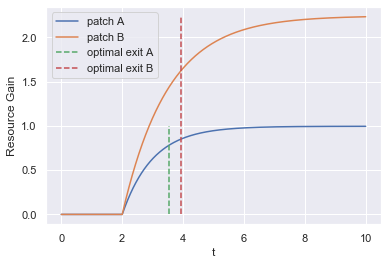

In [525]:
sns.lineplot(y ='I_a',x = 't', data = df2)
sns.lineplot(y ='I_b',x = 't', data = df2)
plt.plot([t_opt_a, t_opt_a], [0, df2['I_a'].max()], linestyle = '--')
plt.plot([t_opt_b, t_opt_b], [0, df2['I_b'].max()], linestyle = '--');
plt.ylabel('Resource Gain'); plt.legend(['patch A','patch B','optimal exit A', 'optimal exit B']);

_Exit time is more for resource rich patch!_

What happens if parameter being considered is __Proportional Resource Gain__ instead of __Cumulative Resource Gain__?

$\text{Let us normalise } I \ \text{by} \ I_{max}$:

In [555]:
#Now numerically integrate both patches and get optimal exit times
df2['I_a'] = euler(1e-2,t_max,I_dot_a); df2['I_b'] = euler(1e-2,t_max,I_dot_b);
df2['I_a_norm'] = df2['I_a']/df2['I_a'].max(); df2['I_b_norm'] = df2['I_b']/df2['I_b'].max();
df2['I/t_a'] = df2['I_a']/df2['t']
df2['I/t_b'] = df2['I_b']/df2['t']
t_opt_a = df2['t'][df2['I_dot_a']<df2['I/t_a']].iloc[0]
t_opt_b = df2['t'][df2['I_dot_b']<df2['I/t_b']].iloc[0]

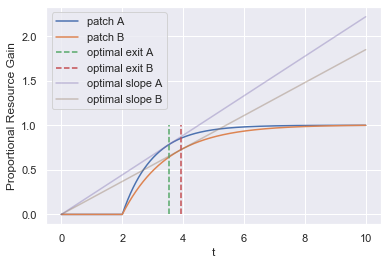

In [557]:
sns.lineplot(y ='I_a_norm',x = 't', data = df2)
sns.lineplot(y ='I_b_norm',x = 't', data = df2)
plt.plot([t_opt_a, t_opt_a], [0, df2['I_a_norm'].max()], linestyle = '--')
plt.plot([t_opt_b, t_opt_b], [0, df2['I_b_norm'].max()], linestyle = '--');

df2['optimality_a'] = (df2['I_a_norm'][df2['t']>=t_opt_a].iloc[0])/t_opt_a*df2['t']
sns.lineplot(y ='optimality_a',x = 't', data = df2, alpha = 0.4)

df2['optimality_b'] = (df2['I_b_norm'][df2['t']>=t_opt_b].iloc[0])/t_opt_b*df2['t']
sns.lineplot(y ='optimality_b',x = 't', data = df2, alpha = 0.4);

plt.ylabel('Proportional Resource Gain'); plt.legend(['patch A','patch B','optimal exit A', 'optimal exit B','optimal slope A','optimal slope B']);

Note that even when we look at proportional resource gain, the line that passes through the origin and the y value at the optimal exit time is tangential to the curve

## Single environment with distinct patch types

In the previous case, we saw what the optimal exit time should be for an animal foraging in two distinct environments, each with a single patch type. Now we will see what happens in the case of a single environment with 2 distinct patch types

In this environment, the low resource patches and the high resource patches are equally abundant:
Therefore, the average foraging rate for this environment is going to be a mean of the average foraging rate for the two different patch types

In [559]:
df3 = df2.copy()

In [560]:
#get the average consumption rate for the habitat
df3['I/t_a'] = df3['I_a']/df3['t']
df3['I/t_b'] = df3['I_b']/df3['t']

df3['I/t'] = 0.5*(df3['I/t_a']+df3['I/t_b'])

t_opt_a = df3['t'][df2['I_dot_a']<df3['I/t']].iloc[0]
t_opt_b = df3['t'][df2['I_dot_b']<df3['I/t']].iloc[0]

#get the line of optimal slope
df3['optimality'] = (df3['I/t'][df['t']>=t_opt].iloc[0])*df['t']

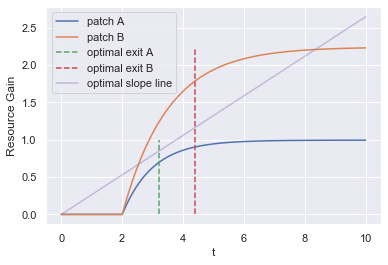

In [562]:
sns.lineplot(y ='I_a',x = 't', data = df3)
sns.lineplot(y ='I_b',x = 't', data = df3)
plt.plot([t_opt_a, t_opt_a], [0, df3['I_a'].max()], linestyle = '--')
plt.plot([t_opt_b, t_opt_b], [0, df3['I_b'].max()], linestyle = '--');
sns.lineplot(y ='optimality',x = 't', data = df3, alpha = 0.4);
plt.ylabel('Resource Gain'); plt.legend(['patch A','patch B','optimal exit A', 'optimal exit B','optimal slope line']);

This can also be extended to the case where the resource rich/poor patches are further away and hence have higher traveling times